#Bistability Project

##Author: David Herz
Bistability in any dynamic system, biological, mechanical, or otherwise, is the ability of a system to have two stable states of equilibrium. Understanding how biological systems exhibit bistability is helpful, if not essential, to clearly understanding cell “decision-making” processes such as cellular differentiation and apoptosis[1]. In Timothy Gardner’s paper “Construction of a Genetic Toggle Switch in Escherichia Coli,” however, they explore a synthetic approach to bistability as a model for the construction of a cellular “toggle switch,” in which two stable states are maintained by the activation and repression of different transcription factors[2]. While it is the case that some of these toggle switches are utilized in nature, the ability to create and alter new switches opens up potential future applications such as developing complex gene networks, or treating the cell as a memory unit for use in biotechnology[3].

In order to look at bistability with more depth, we will be exploring the properties of the toggle switch model. The figure below details the interactions of the repressor/promoter system.

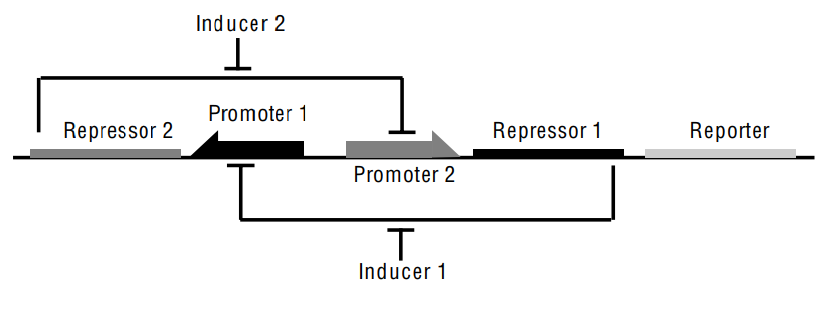

**Figure 1.** Toggle switch design. Repressor 1 inhibits transcription from Promoter 1 and is induced by Inducer 1. Repressor 2 inhibits transcription from Promoter 2 and is induced by Inducer 2.

This model can be used to represent any number of promoter-repressor pairs. One example used in this paper is a lac repressor Ptrc-2 promoter pair, and a Tet repressor PLtetO-1 promoter pair. When left alone without an inducer, these pairs will reach one of two stable states, where either repressor 1 and promoter 2, or repressor 2 and promoter 1 are supressed to a near-zero level.

Through the completion of this notebook, the user should be able to understand and describe the function and variables involved in the toggle switch bistable system.

##Task 1

Using the above figure and the provided variables, create a system of two ordinary differential equations to describe the system. Ignore the induction of each repressor for now.

The graph below should provide the general geometric structure to the equations.

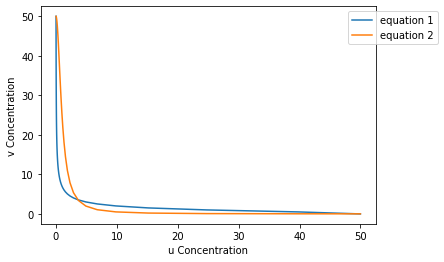

In [2]:
import numpy as np                  # import data structuring
from scipy.integrate import odeint  # import ODE integrating function
import matplotlib.pyplot as plt     # import plotting libraries
import math as m                    # import math operations

dUdt      = 0 # The change in concentration of repressor 1 over time is held constant
dVdt      = 0 # The change in concentration of repressor 2 over time is held constant
alpha_1 = 50 # Rate of synthesis for repressor 1
alpha_2 = 50 # Rate of synthesis for repressor 2
beta    = 2 # Cooperativity of repression of promoter 2
gamma   = 2 # Cooperativity of repression of promoter 1


#Creates the range of values for repressors u and v
v       = np.linspace(0, 50.0, 100)
u       = np.linspace(0, 50.0, 100)

for i in range(len(u)):
  u[i]= (alpha_1/(1+v[i]**beta))-dUdt   #After creating the first differential equation, solve for u and index both u and v such that u= u[i] and v= v[i]
  
plt.plot(u,v,  label='equation 1');

for i in range(len(v)):
  v[i]= (alpha_2/(1+u[i]**gamma))-dVdt
  
plt.plot(u,v,  label='equation 2');
plt.xlabel('u Concentration')
plt.ylabel('v Concentration')
plt.legend(loc=1, bbox_to_anchor=(1.2, 1))
#dUdt   = (alpha_1/(1+v**beta))  -  u

#dVdt   = (alpha_2/(1+u**gamma))  -  v


The generated graph of these equations should look like this:


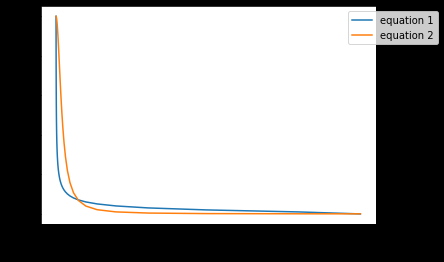

- Considering that changes in concentrations of repressors is being held constant over time, what does this graph show in terms of the steady states of repressors u and v?

The graphs serve to show the potential solutions to the differential equations, the intersections being places where the values overlap. Under the conditions listed, there are 3 potential solutions, one where v is high with no u, one where u is high with no v, and one where v and u are equal, though we know and will show that the state where u and v are equal is not a stable state, and only can exist when u is being induced from a high v, or vice versa. Here this state can exist because u and v are perfectly at the same synthesis rate, and repression rate.
- This data assumes that the repressor strengths and the rates of production are the same. What happens when one of the repressors is considerably weaker than the other? When the production rate of one is higher?

When the cooperation of repression of repressor 2 is reduced from 2 to 1, the second equation shifts drastically to allow only one real solution, one where u, or repressor 1, is high and v, or repressor 2 is low. This is because without the ability of v to supress u, any amount of u will be enough to supress all the v in the system, so any amount of synthesis will create these conditions.

Changing the rate of synthesis in the equation at first glance appears to change the graphs in the same way as when changing the repression rate. However, unlike with the changes in repression, the equations still meet at both ends, allowing for 2 states to exist when one is synthesized much more than the other. Increasing the rate of synthesis only serves to increase the stable state of the repressor altered. For instance, if the synthesis rate of u is changes from 50 to 150, the curves are stretched to allow a stable amount of u to be 150 in the absence of v.

##Task 2

In order to switch between each state of our system, an inducer is nessessary. For this model, we will be simulating a possible promoter-repressor system in which repressor 2 is inducible by IPTG(Isopropyl β- d-1-thiogalactopyranoside).

Include the differential equations from the previous model, substituting u/(1+IPTG/K)**eta for u in the second equation.

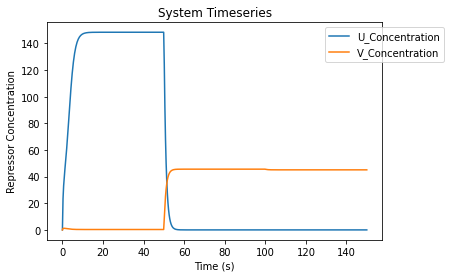

In [5]:

import numpy as np                  # import data structuring
from scipy.integrate import odeint  # import ODE integrating function
import matplotlib.pyplot as plt     # import plotting libraries
import math as m                    # import math operations


alpha_1 = 156 # Rate of synthesis for repressor 1
alpha_2 = 45.6 # Rate of synthesis for repressor 2
beta    = 2.5 # Cooperativity of repression of promoter 2
gamma   = 1 # Cooperativity of repression of promoter 1


K       = 0.000029618 # Dissociation constant of IPTG from LacR
eta     = 2.0015 # Cooperativity of IPTG binding

#Initial Conditions
u0      = 0
v0      = 0

y0      = [u0, v0]


t       = np.linspace(0, 150, 500)

threshold1 = 50 #Threshold will be where we turn IPTG on or off later
threshold2 = 100


#Function to solve set of ODEs.
def model(y, t):
  if threshold1 < t < threshold2:
    IPTG = 1
  elif t > threshold2: 
    IPTG = 0
  else:
    IPTG = 0  # These if statements set IPTG at 0 from time 0 to threshold 1, 1 from time threshold 1 to threshold 2, and 0 again after threshold 2. Feel free to mess around with the thresholds and levels of IPTG.
  u     = y[0]
  v     = y[1]
  #Toggle switch differential equation set
  
  dUdt   = (alpha_1/(1+v**beta))  -  u
  dVdt   = (alpha_2/(1+(u/(1+IPTG/K)**eta)**gamma))  -  v
  #dVdt   = (alpha_2/(1+u**gamma))  -  v


  # Return a list of the increment values
  return [dUdt, dVdt]




#ODE solution script
soln  = odeint(model, y0, t)

#assigns variable names to solution matrix

U_Concentration      = soln[:, 0]
V_Concentration      = soln[:, 1]

#Figure 1: Plot Concentrations
plt.plot(t, U_Concentration,  label='U_Concentration')
plt.plot(t, V_Concentration,  label='V_Concentration')
plt.title('System Timeseries')
plt.xlabel('Time (s)')
plt.ylabel('Repressor Concentration')
plt.legend(loc=1, bbox_to_anchor=(1.2, 1))


The generated graph should look something like this:

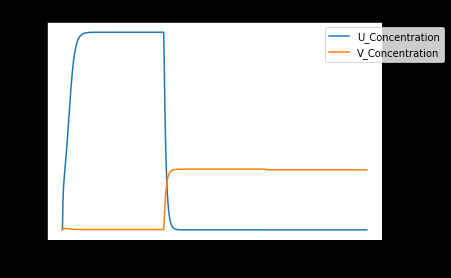

- Why does v concentration not decrease when we remove IPTG induction at t= 100?

This is the main function of the toggle switch, in the absence of an inducer, one repressor will maintain its value and supress any of the opposing repressor. When IPTG is not being induced, when there is sufficiently more v than there us u, u cannot be presented due to v existing in much larger amounts, supressing u.
- Why is the stable amount of v so much lower than that of u?

This is solely due to the synthesis rates of each repressor. U dominates the system initially because it is synthesized much faster than v, and is able to reach a steady state. Once v is induced, it will still only be produced at the normal synthesis rate, but it is able to do so without being supressed by u.
- What happens when repressor 2 is weaker than the values included in the model? Why?

If the rate of repression is reduced from 2.5 to 1.5, u is synthesized too quickly for v to be able to supress it. This results in the switch not being "sticky" and u returning to the normal value once IPTG is no longer being induced. This shows that the repression of v needs to be considerable, taking into account the synthesis rates of both u and v.

- Instead of inducing IPTG at a value of 1, try inducing IPTG at values 0, 0.0013, 0.0014, and 10, observering the resulting graphs. What trends do you notice? What does this mean for the value of IPTG in the system?

If IPTG is not induced, or set to a value of 0, then v is never able to reach a non-zero steady state, as it is synthesized much slower than u. If IPTG is set to a value of 0.0013 at the induction, it is not a sufficient value to properly induce v, and the exact same curve happens as it does the first time. If IPTG is set to a value of 0.0014, it operates at normal capacity, successfully inducing v as it does when IPTG is 1, or any number above 0.0014. This shows that there is no intermediate graphs or values u or v can be when IPTG induction is being considered. IPTG is either working, and successfully inducing the system, or not, there is no in between or intermediate phage of stability for the system.

##Task 3

Next we will be looking a little bit closer at the data generated from the previous section, specifically at how U and V concentrations compare to one another.

Input the differential equations from before. This time, we will graph U concentrations against V concentrations, noting the behavior.

Text(0, 0.5, 'V Concentration')

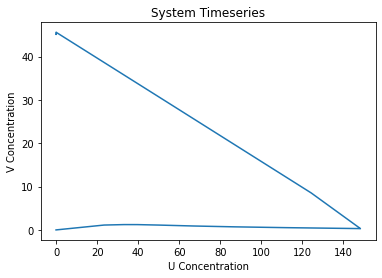

In [ ]:
import numpy as np                  # import data structuring
from scipy.integrate import odeint  # import ODE integrating function
import matplotlib.pyplot as plt     # import plotting libraries
import math as m                    # import math operations


alpha_1 = 156 # Rate of synthesis for repressor 1
alpha_2 = 45.6 # Rate of synthesis for repressor 2
beta    = 2.5 # Cooperativity of repression of promoter 2
gamma   = 1 # Cooperativity of repression of promoter 1


K       = 0.000029618 # Dissociation constant of IPTG from LacR
eta     = 2.0015 # Cooperativity of IPTG binding

#Initial Conditions
u0      = 0
v0      = 0

y0      = [u0, v0]


t       = np.linspace(0, 150, 500)

threshold1 = 50 #Threshold will be where we turn IPTG on or off later
threshold2 = 100


#Function to solve set of ODEs.
def model(y, t):
  if threshold1 < t < threshold2:
    IPTG = 1
  elif t > threshold2: 
    IPTG = 0
  else:
    IPTG = 0  # These if statements set IPTG at 0 from time 0 to threshold 1, 1 from time threshold 1 to threshold 2, and 0 again after threshold 2. Feel free to mess around with the thresholds and levels of IPTG.
  u     = y[0]
  v     = y[1]
  #Toggle switch differential equation set
  
  dUdt   = (alpha_1/(1+v**beta))  -  u
  dVdt   = (alpha_2/(1+(u/(1+IPTG/K)**eta)**gamma))  -  v
  #dVdt   = (alpha_2/(1+u**gamma))  -  v


  # Return a list of the increment values
  return [dUdt, dVdt]




#ODE solution script
soln  = odeint(model, y0, t)

#assigns variable names to solution matrix

U_Concentration      = soln[:, 0]
V_Concentration      = soln[:, 1]

#Figure 1: Plot Concentrations
plt.plot(U_Concentration, V_Concentration,)
plt.title('System Timeseries')
plt.xlabel('U Concentration')
plt.ylabel('V Concentration')


The generated graph should look something like this:

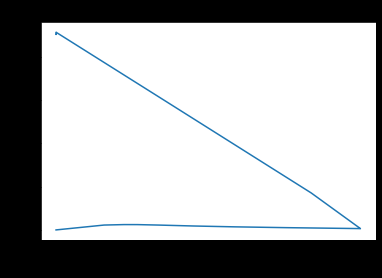

- This graph forms a triangle with three distinct points. What does each point mean with respect to a bistable system?

Each point represents the different states that the system exists in. Initially, there is no v or u, which is the only time this occurs, as u and v immediately begin synthesizing. Then u increases slowly, as v does have some ability to supress u when u is low. Then u increases freely to its synthesis rate and reaches the second point. It would remain at this point indefinitely without the induction of v, but the line between the second and third points is that induction. There is no steady state between the second and third points, and values only exist there as u is being reduced and v is being induced. The third point is the state of the system after v is induced, and it remains there even after IPTG is removed. If u is then induced after this point, the system returns to exactly point 2.
- What do the lines connecting them represent? Feel free to look back to the previous task to form a timeline.

Answered above.

References

[1] Ghaffarizadeh A, Flann NS, Podgorski GJ (2014). "Multistable switches and their role in cellular differentiation networks". BMC Bioinformatics.

[2] Gardner, T., Cantor, C. & Collins, J. Construction of a genetic toggle switch in Escherichia coli. Nature 403, 339–342 (2000).

[3] Fritz G, Buchler NE, Hwa T, Gerland U. Designing sequential transcription logic: a simple genetic circuit for conditional memory. Syst Synth Biol. 2007;1(2):89-98.